In [103]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from pandas import json_normalize

In [104]:

dfa = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/Viz-Templates/master/valladolidA.csv')
dfa

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [105]:
df_dolid = dfa.loc[(dfa['teamId']=='Valladolid')]
df_dolid

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
8,2248226981,3,0,11.0,Valladolid,81.6,13.6,1,BlockedPass,Successful,382939.0,NaN,NaN
19,2248227139,5,0,53.0,Valladolid,51.4,42.7,1,BallTouch,Successful,106868.0,NaN,NaN
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2
29,2248227395,8,1,32.0,Valladolid,20.3,8.2,1,Pass,Unsuccessful,106868.0,26.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2248257089,776,93,55.0,Valladolid,3.6,50.0,2,Save,Successful,91254.0,NaN,NaN
1670,2248257091,777,93,57.0,Valladolid,13.1,50.4,2,CornerAwarded,Unsuccessful,91254.0,NaN,NaN
1672,2248257145,778,94,0.0,Valladolid,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [106]:
df_dolid['passer']=df_dolid['playerId']
df_dolid['recipient']=df_dolid['playerId'].shift(-1)

passes = df_dolid.loc[(df_dolid['type']=='Pass')]
successful = passes[(passes['outcome']=='Successful')]


<ipython-input-106-6e105b7ce833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolid['passer']=df_dolid['playerId']
<ipython-input-106-6e105b7ce833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolid['recipient']=df_dolid['playerId'].shift(-1)


In [107]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2,121734.0,106868.0
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,365371.0,9.7,4.1,365371.0,121734.0
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,121734.0,55.3,34.4,121734.0,382939.0
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,382939.0,55.9,26.6,382939.0,402185.0
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,402185.0,70.5,69.0,402185.0,141533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,362355.0,60.5,0.8,362355.0,121734.0
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,121544.0,10.5,72.3,121544.0,279711.0
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,279711.0,14.7,88.7,279711.0,323135.0
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,121544.0,25.5,94.4,121544.0,108176.0


In [108]:
# determine the first substitution of the game

#subs = df_dolid.loc[(df_dolid['type']=='SubstitutionOff')]
#subs = subs['minute']
#firstsub = subs.min()
#firstsub

In [109]:
#successful = successful.loc[(successful['minute']<firstsub)]

In [110]:
# to convert float values into integers

pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')

In [111]:
successful['passer']=pas
successful['recipient']=rec

<ipython-input-111-8aa18fb4381a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer']=pas
<ipython-input-111-8aa18fb4381a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient']=rec


In [112]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2,121734,106868
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,365371.0,9.7,4.1,365371,121734
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,121734.0,55.3,34.4,121734,382939
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,382939.0,55.9,26.6,382939,402185
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,402185.0,70.5,69.0,402185,141533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,362355.0,60.5,0.8,362355,121734
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,121544.0,10.5,72.3,121544,279711
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,279711.0,14.7,88.7,279711,323135
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,121544.0,25.5,94.4,121544,108176


In [113]:
# average locations & count of passes made by players & grouped by passer

avg_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
#naming new columns
avg_locations.columns=['x','y','count']

In [114]:
avg_locations.head()

,x,y,count
passer,,,
25714,50.980000,46.480000,10
91254,8.275000,53.056250,16
106868,43.915385,39.300000,26
108176,48.042857,55.666667,21
121544,45.437778,88.100000,45


In [115]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns', inplace = True)

pass_between = pass_between.merge(avg_locations, left_on ='passer',right_index = True)
pass_between = pass_between.merge(avg_locations, left_on ='recipient',right_index = True,suffixes=['','_end'])

In [116]:
avg_end_locations = successful.groupby('passer').agg({'endX':['mean'],'endY':['mean','count']})
#naming new columns
avg_end_locations.columns=['endX','endY','count_end']

In [117]:
avg_end_locations.head()

,endX,endY,count_end
passer,,,
25714,47.410000,46.600000,10
91254,24.443750,60.081250,16
106868,46.546154,49.257692,26
108176,53.442857,57.614286,21
121544,49.075556,79.813333,45


In [118]:
#pass_between[['x','y','count']]=avg_locations[['x','y','count']] 
#pass_between[['endX','endY','count_end']]=avg_end_locations[['endX','endY','count_end']]

In [119]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,25714,108176,3,50.980000,46.480000,10,48.042857,55.666667,21
33,121544,108176,3,45.437778,88.100000,45,48.042857,55.666667,21
44,121734,108176,2,44.534545,12.170909,55,48.042857,55.666667,21
66,279711,108176,1,42.945652,64.160870,46,48.042857,55.666667,21
88,362355,108176,4,57.164000,57.160000,25,48.042857,55.666667,21
...,...,...,...,...,...,...,...,...,...
48,121734,323135,1,44.534545,12.170909,55,44.100000,55.250000,2
70,279711,323135,1,42.945652,64.160870,46,44.100000,55.250000,2
93,362355,323135,1,57.164000,57.160000,25,44.100000,55.250000,2
103,365371,323135,3,30.386842,26.400000,38,44.100000,55.250000,2


In [120]:
#filtered atleast more than 1 pass made btwn players

pass_between = pass_between[pass_between['pass_count']>2]

In [121]:
pass_between.head()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,25714,108176,3,50.980000,46.4800,10,48.042857,55.666667,21
33,121544,108176,3,45.437778,88.1000,45,48.042857,55.666667,21
88,362355,108176,4,57.164000,57.1600,25,48.042857,55.666667,21
122,395579,108176,4,48.600000,49.7625,24,48.042857,55.666667,21
14,106868,121544,4,43.915385,39.3000,26,45.437778,88.100000,45


Text(0.5, 1.0, 'Valladolid pass network')

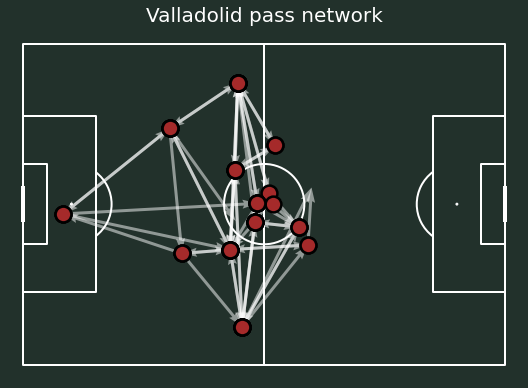

In [132]:
#Plotting the football pitch

fig, ax = plt.subplots(figsize = (10, 6.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch = Pitch(pitch_type = 'statsbomb',orientation ='horizontal',view = 'half',positional = False,constrained_layout = False,tight_layout=False,pitch_color='#22312b', line_color='white',
              stripe=False)
pitch.draw(ax = ax)

# to equate the axis to the pitch axis
# using mpl soccer arrows and nodes package to plot the pass networks

arrows = pitch.arrows(1.2*pass_between.x,0.8*pass_between.y,1.2*pass_between.x_end,0.8*pass_between.y_end,ax=ax,width=3,headwidth=3,color='white',zorder=1,alpha=0.5)

nodes = pitch.scatter(1.2*pass_between.x,0.8*pass_between.y,color='brown',s = 250,edgecolors='black',linewidth=2.5,alpha=1,zorder=1,ax=ax)

plt.title('Valladolid pass network', color='white',size = 20)